# Proyecto Deep Learning Toni - Houses Madrid

### Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy import stats

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


### Importamos el Dataset desde un csv


In [2]:
df = pd.read_csv('houses_Madrid.csv', sep=',', index_col=0)
print(df.shape)
df.head()


(21742, 57)


,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


### Observamos el dataset

In [3]:
def data_report(dframe):
    #pd.set_option("display.max_rows", None, "display.max_columns", None)
    # Sacamos los NOMBRES
    cols = pd.DataFrame(dframe.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(dframe.dtypes.values, columns=["DATA_TYPE"])


    # Sacamos los MISSINGS
    percent_missing = round(dframe.isnull().sum()*100/len(df),2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns = ["MISSINGS (%)"])


    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(dframe.nunique().values, columns = ["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos["UNIQUE_VALUES"]*100/len(df),2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns = ["CARDIN (%)"])
    
    # Unimos
    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1)
    concatenado.set_index("COL_N", drop=True, inplace=True)
    
    return concatenado.T


data_report(df)

COL_N,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
DATA_TYPE,int64,object,object,float64,float64,int64,float64,float64,float64,float64,...,object,bool,float64,float64,object,float64,object,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.58,62.16,0.0,0.07,93.39,93.41,100.0,...,0.0,0.0,100.0,100.0,64.5,64.5,47.76,47.76,47.76,47.76
UNIQUE_VALUES,21742,10736,146,678,408,19,16,6,356,0,...,10,2,0,0,2,84,2,2,2,2
CARDIN (%),100.0,49.38,0.67,3.12,1.88,0.09,0.07,0.03,1.64,0.0,...,0.05,0.01,0.0,0.0,0.01,0.39,0.01,0.01,0.01,0.01


## Eliminamos todas las columnas que a simple vista, en excel y por sentido común, no nos interesan por la información que contienen

In [4]:
df=df.drop(['id','title','latitude','is_accessible', 'has_green_zones', 'longitude', 'is_furnished', 'is_kitchen_equipped','are_pets_allowed','portal','door','operation','rent_price_by_area','has_private_parking','has_public_parking', 'sq_mt_allotment', 'raw_address', 'is_exact_address_hidden', 'street_number','portal','door','is_floor_under','is_parking_included_in_price','parking_price','street_name','is_buy_price_known','is_rent_price_known','rent_price'], axis=1)
print(df.shape)
df.head()

(21742, 31)


,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price,buy_price_by_area,...,has_pool,has_terrace,has_balcony,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,"San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,3,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,85000,1328,...,NaN,NaN,NaN,NaN,D,False,False,True,False,False
1,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,4,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,129900,1856,...,NaN,True,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN
2,"San Andrés, Madrid",94.0,54.0,2,2.0,NaN,1,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,144247,1535,...,NaN,NaN,NaN,True,no indicado,False,NaN,NaN,NaN,NaN
3,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,Bajo,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,109900,1717,...,NaN,NaN,NaN,True,en trámite,False,False,False,True,False
4,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,4,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,260000,2407,...,True,NaN,NaN,True,en trámite,True,True,True,True,True


## Observamos como ha quedado el dataset

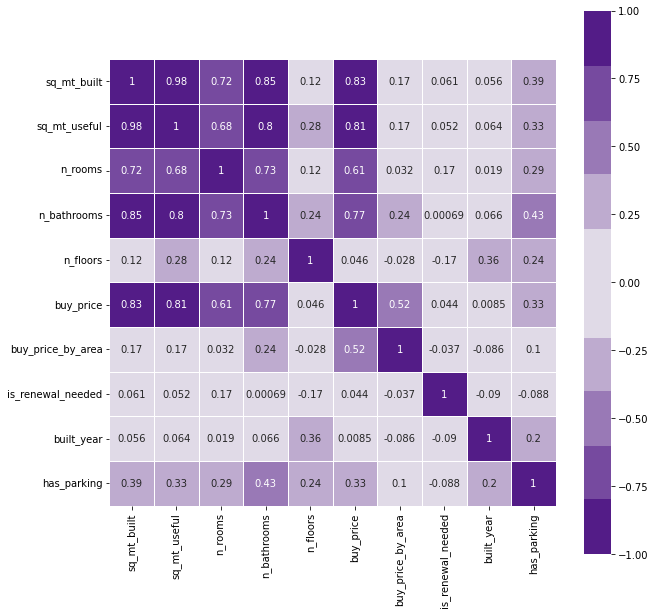

In [5]:
#heatmap de correlación, numéricas
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           center=0,
           cmap=sns.diverging_palette(280, 280, s=85, l=25, n=10),
           square=True,
           annot=True,
           linewidths=.5);

In [6]:
# Tipos de los datos y missings
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21742 entries, 0 to 21741
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   subtitle                21742 non-null  object 
 1   sq_mt_built             21616 non-null  float64
 2   sq_mt_useful            8228 non-null   float64
 3   n_rooms                 21742 non-null  int64  
 4   n_bathrooms             21726 non-null  float64
 5   n_floors                1437 non-null   float64
 6   floor                   19135 non-null  object 
 7   neighborhood_id         21742 non-null  object 
 8   buy_price               21742 non-null  int64  
 9   buy_price_by_area       21742 non-null  int64  
 10  house_type_id           21351 non-null  object 
 11  is_renewal_needed       21742 non-null  bool   
 12  is_new_development      20750 non-null  object 
 13  built_year              10000 non-null  float64
 14  has_central_heating     13608 non-null

In [7]:
# Estadísticos
print(df.describe(include="all"))

                 subtitle   sq_mt_built  sq_mt_useful       n_rooms  \
count               21742  21616.000000   8228.000000  21742.000000   
unique                146           NaN           NaN           NaN   
top     Chamartín, Madrid           NaN           NaN           NaN   
freq                  851           NaN           NaN           NaN   
mean                  NaN    146.920892    103.458192      3.005749   
std                   NaN    134.181865     88.259192      1.510497   
min                   NaN     13.000000      1.000000      0.000000   
25%                   NaN     70.000000     59.000000      2.000000   
50%                   NaN    100.000000     79.000000      3.000000   
75%                   NaN    162.000000    113.000000      4.000000   
max                   NaN    999.000000    998.000000     24.000000   

         n_bathrooms     n_floors  floor  \
count   21726.000000  1437.000000  19135   
unique           NaN          NaN     19   
top            

## Empezamos a tratar los datos de las columnas de interés tras volver a observar el dataset de manera general

#### Se puede observar como cuando la variable house_type_id es 2, es una casa, indicando siempre is_exterior, orientation, fitted wardd y floor, apareceran como missings

In [8]:
df['house_type_id'].value_counts()

HouseType 1: Pisos            17705
HouseType 2: Casa o chalet     1938
HouseType 5: Áticos            1032
HouseType 4: Dúplex             676
Name: house_type_id, dtype: int64

In [9]:
#tratamos esos missings con los valores de una casa por defecto
for i in range(len(df)):
        if df['house_type_id'].values[i] == 'HouseType 2: Casa o chalet':
                df['is_exterior'].values[i]=True
                df['floor'].values[i] = 'Bajo'
                df['is_orientation_east'].values[i] = True
                df['is_orientation_north'].values[i] = True
                df['is_orientation_south'].values[i] = True
                df['is_orientation_west'].values[i] = True
                df['has_fitted_wardrobes'].values[i] = True

### Modificamos las columnas con strings largos e información irrelevante

In [10]:
#dejamos solo el nombre de barrio
df['subtitle'] = df['subtitle'].str.split(',').str[0]

#dejamos solo el tipo de casa
df['house_type_id'] = df['house_type_id'].str.split(':').str[0]

#dejamos solo el nombre del distrito
df['neighborhood_id'] = df['neighborhood_id'].str.split(':', n=2).str.get(-1)

print(df.shape)
df.head()

(21742, 31)


,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price,buy_price_by_area,...,has_pool,has_terrace,has_balcony,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,San Cristóbal,64.0,60.0,2,1.0,NaN,3,Villaverde,85000,1328,...,NaN,NaN,NaN,NaN,D,False,False,True,False,False
1,Los Ángeles,70.0,NaN,3,1.0,NaN,4,Villaverde,129900,1856,...,NaN,True,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN
2,San Andrés,94.0,54.0,2,2.0,NaN,1,Villaverde,144247,1535,...,NaN,NaN,NaN,True,no indicado,False,NaN,NaN,NaN,NaN
3,San Andrés,64.0,NaN,2,1.0,NaN,Bajo,Villaverde,109900,1717,...,NaN,NaN,NaN,True,en trámite,False,False,False,True,False
4,Los Rosales,108.0,90.0,2,2.0,NaN,4,Villaverde,260000,2407,...,True,NaN,NaN,True,en trámite,True,True,True,True,True


### Cambiamos los distritos por sus numeros respectivos que la comunidad de madrid asigna siguiendo un orden de lejanía respecto al centro, de más cerca a menos.

In [11]:
df.neighborhood_id.unique()

array([' Villaverde', ' Vicálvaro', ' Villa de Vallecas', ' Usera',
       ' Tetuán', ' Retiro', ' Puente de Vallecas', ' Moncloa',
       ' Moratalaz', ' Latina', ' Fuencarral', ' Hortaleza', ' Chamberí',
       ' Ciudad Lineal', ' Chamartín', ' Centro', ' Carabanchel',
       ' Salamanca', ' Arganzuela', ' Barajas'], dtype=object)

In [12]:

df['neighborhood_id'] = df['neighborhood_id'].replace([' Centro'],1)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Arganzuela'],2)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Retiro'],3)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Salamanca'],4)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Chamartín'],5)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Tetuán'],6)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Chamberí'],7)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Fuencarral'],8)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Moncloa'],9)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Latina'],10)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Carabanchel'],11)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Usera'],12)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Puente de Vallecas'],13)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Moratalaz'],14)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Ciudad Lineal'],15)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Hortaleza'],16)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Villaverde'],17)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Villa de Vallecas'],18)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Vicálvaro'],19)
df['neighborhood_id'] = df['neighborhood_id'].replace([' Barajas'],20)

In [13]:
df.neighborhood_id.unique()

array([17, 19, 18, 12,  6,  3, 13,  9, 14, 10,  8, 16,  7, 15,  5,  1, 11,
        4,  2, 20], dtype=int64)

### Rellenamos el resto de NaNs que se pueden intuir observando los datos en excel

In [14]:
# cuando no hay nada indicado significa que solo hay una planta, por lo tanto, rellenamos con 1
df['n_floors'] = df['n_floors'].fillna(1)

# si estan reformados siempre se indica, rellenamos con False los missings
df['is_new_development'] = df['is_new_development'].fillna(False)

# si hay calefacción central siempre se indica, rellenamos con False si no hay valores
df['has_central_heating'] = df['has_central_heating'].fillna(False)

# esta columna depende de la anterior, si hay calefacción central indicará False, si no hay calefacción central siempre habrá individual, rellenamos con True
df['has_individual_heating'] = df['has_individual_heating'].fillna(True)

# todos los valores son True, por lo tanto en los que no hay nada rellenamos con False
df['has_ac'] = df['has_ac'].fillna(False)

# si hay armarios empotrados siempre se indica, rellenamos con False si no hay valores
df['has_fitted_wardrobes'] = df['has_fitted_wardrobes'].fillna(False)

# si hay ascensor siempre se indica, rellenamos con False si no hay valores
df['has_lift'] = df['has_lift'].fillna(False)

# si hay jardín siempre se indica, rellenamos con False si no hay valores
df['has_garden'] = df['has_garden'].fillna(False)

# si hay piscina siempre se indica, rellenamos con False si no hay valores
df['has_pool'] = df['has_pool'].fillna(False)

# si hay terraza siempre se indica, rellenamos con False si no hay valores
df['has_terrace'] = df['has_terrace'].fillna(False)

# si hay balcon siempre se indica, rellenamos con False si no hay valores
df['has_balcony'] = df['has_balcony'].fillna(False)

# si hay trastero siempre se indica, rellenamos con False si no hay valores
df['has_storage_room'] = df['has_storage_room'].fillna(False)

df

,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price,buy_price_by_area,...,has_pool,has_terrace,has_balcony,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,San Cristóbal,64.0,60.0,2,1.0,1.0,3,17,85000,1328,...,False,False,False,False,D,False,False,True,False,False
1,Los Ángeles,70.0,NaN,3,1.0,1.0,4,17,129900,1856,...,False,True,False,False,en trámite,False,NaN,NaN,NaN,NaN
2,San Andrés,94.0,54.0,2,2.0,1.0,1,17,144247,1535,...,False,False,False,True,no indicado,False,NaN,NaN,NaN,NaN
3,San Andrés,64.0,NaN,2,1.0,1.0,Bajo,17,109900,1717,...,False,False,False,True,en trámite,False,False,False,True,False
4,Los Rosales,108.0,90.0,2,2.0,1.0,4,17,260000,2407,...,True,False,False,True,en trámite,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,Barajas,78.0,NaN,2,2.0,1.0,4,20,350000,4487,...,False,False,False,True,en trámite,True,NaN,NaN,NaN,NaN
21738,Barajas,96.0,83.0,2,2.0,1.0,3,20,425000,4427,...,True,False,False,True,en trámite,True,False,True,True,True
21739,Barajas,175.0,NaN,4,2.0,1.0,Bajo,20,680000,3886,...,True,True,False,True,E,True,NaN,NaN,NaN,NaN
21740,Campo de las Naciones-Corralejos,289.0,NaN,4,3.0,3.0,Bajo,20,695000,2405,...,False,True,True,True,en trámite,True,True,True,True,True


### Forzamos los types de los True y False, ya sin NaNs, para obtener 1 y 0

In [15]:
df['has_pool']=df['has_pool'].astype(int)
df['is_renewal_needed']=df['is_renewal_needed'].astype(int)
df['is_new_development']=df['is_new_development'].astype(int)
df['has_central_heating']=df['has_central_heating'].astype(int)
df['has_individual_heating']=df['has_individual_heating'].astype(int)
df['has_ac']=df['has_ac'].astype(int)
df['has_fitted_wardrobes']=df['has_fitted_wardrobes'].astype(int)
df['has_lift']=df['has_lift'].astype(int)
df['has_garden']=df['has_garden'].astype(int)
df['has_terrace']=df['has_terrace'].astype(int)
df['has_balcony']=df['has_balcony'].astype(int)
df['has_storage_room']=df['has_storage_room'].astype(int)
df['has_parking']=df['has_parking'].astype(int)

## Observamos el Dataset final antes de dividir en Train y Test

In [16]:
# Primeros/ultimos registros
print(df.head())
print(df.tail())

        subtitle  sq_mt_built  sq_mt_useful  n_rooms  n_bathrooms  n_floors  \
0  San Cristóbal         64.0          60.0        2          1.0       1.0   
1    Los Ángeles         70.0           NaN        3          1.0       1.0   
2     San Andrés         94.0          54.0        2          2.0       1.0   
3     San Andrés         64.0           NaN        2          1.0       1.0   
4    Los Rosales        108.0          90.0        2          2.0       1.0   

  floor  neighborhood_id  buy_price  buy_price_by_area  ... has_pool  \
0     3               17      85000               1328  ...        0   
1     4               17     129900               1856  ...        0   
2     1               17     144247               1535  ...        0   
3  Bajo               17     109900               1717  ...        0   
4     4               17     260000               2407  ...        1   

   has_terrace  has_balcony  has_storage_room  energy_certificate  \
0            0         

In [17]:
# Columnas del dataset
print(df.columns)

# dimensiones del dataset
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

Index(['subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms', 'n_bathrooms',
       'n_floors', 'floor', 'neighborhood_id', 'buy_price',
       'buy_price_by_area', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony',
       'has_storage_room', 'energy_certificate', 'has_parking',
       'is_orientation_north', 'is_orientation_west', 'is_orientation_south',
       'is_orientation_east'],
      dtype='object')
Filas: 21742
Columnas: 31


In [18]:
# Tipos de los datos
print(df.dtypes)

subtitle                   object
sq_mt_built               float64
sq_mt_useful              float64
n_rooms                     int64
n_bathrooms               float64
n_floors                  float64
floor                      object
neighborhood_id             int64
buy_price                   int64
buy_price_by_area           int64
house_type_id              object
is_renewal_needed           int32
is_new_development          int32
built_year                float64
has_central_heating         int32
has_individual_heating      int32
has_ac                      int32
has_fitted_wardrobes        int32
has_lift                    int32
is_exterior                object
has_garden                  int32
has_pool                    int32
has_terrace                 int32
has_balcony                 int32
has_storage_room            int32
energy_certificate         object
has_parking                 int32
is_orientation_north       object
is_orientation_west        object
is_orientation

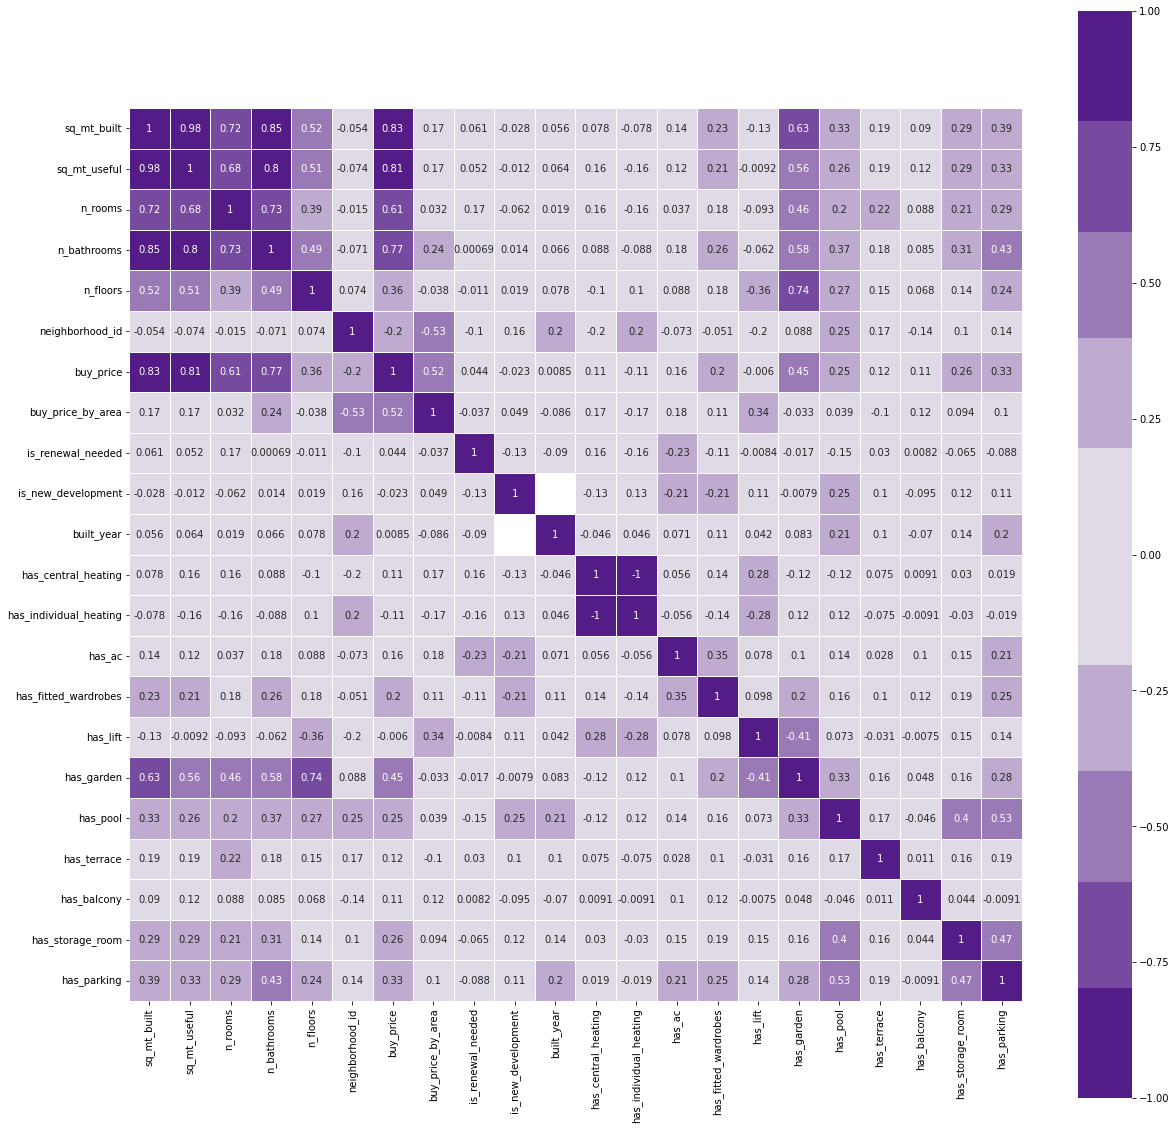

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           center=0,
           cmap=sns.diverging_palette(280, 280, s=85, l=25, n=10),
           square=True,
           annot=True,
           linewidths=.5);

In [20]:
'''Podemos observar como evidentemente hay variables fuertemente relacionadas entre ellas como jardín con numero de plantas o metros construidos, y otras además de entre ellas con el propio target,
los metros construidos, el numero de habitaciones o de baños con el precio de compra. Es decir, todas las variables muy relacionadas entre ellas. Aún así, no descartaremos ninguna de ellas para no
perder información y las volveremos a observar tras un análisis más profundo tras separar en Train y Test.'''

'Podemos observar como evidentemente hay variables fuertemente relacionadas entre ellas como jardín con numero de plantas o metros construidos, y otras además de entre ellas con el propio target,\nlos metros construidos, el numero de habitaciones o de baños con el precio de compra. Es decir, todas las variables muy relacionadas entre ellas. Aún así, no descartaremos ninguna de ellas para no\nperder información y las volveremos a observar tras un análisis más profundo tras separar en Train y Test.'

## Dividimos en train y test

In [21]:
#dividimos en train y test, X e y
X_train, X_test, y_train, y_test = train_test_split(df.drop('buy_price', axis=1),
                df['buy_price'],
                test_size=0.2,
                random_state=42)

In [22]:
print("Total train features shape:", X_train.shape)
print("Total test features shape:", X_test.shape)
print("Total train target shape:", y_train.shape)
print("Total test target shape:", y_test.shape)

Total train features shape: (17393, 30)
Total test features shape: (4349, 30)
Total train target shape: (17393,)
Total test target shape: (4349,)


### Rellenamos NaNs de las orientaciones con las modas

#### Para X_train

In [23]:
print(X_train['is_orientation_south'].value_counts())
print(X_train['is_orientation_north'].value_counts())
print(X_train['is_orientation_east'].value_counts())
print(X_train['is_orientation_west'].value_counts())

True     5453
False    4282
Name: is_orientation_south, dtype: int64
False    6285
True     3450
Name: is_orientation_north, dtype: int64
True     5098
False    4637
Name: is_orientation_east, dtype: int64
False    5408
True     4327
Name: is_orientation_west, dtype: int64


In [24]:
X_train['is_orientation_west'] = X_train['is_orientation_west'].fillna(False)
X_train['is_orientation_east'] = X_train['is_orientation_east'].fillna(True)
X_train['is_orientation_north'] = X_train['is_orientation_north'].fillna(False)
X_train['is_orientation_south'] = X_train['is_orientation_south'].fillna(True)

In [25]:
# Cambiamos los types True y False por 1 y 0
X_train['is_orientation_north']=X_train['is_orientation_north'].astype(int)
X_train['is_orientation_west']=X_train['is_orientation_west'].astype(int)
X_train['is_orientation_south']=X_train['is_orientation_north'].astype(int)
X_train['is_orientation_east']=X_train['is_orientation_east'].astype(int)

#### Para X_test

In [26]:
#rellenamos con la moda de X_train
X_test['is_orientation_west'] = X_test['is_orientation_west'].fillna(False)
X_test['is_orientation_east'] = X_test['is_orientation_east'].fillna(True)
X_test['is_orientation_north'] = X_test['is_orientation_north'].fillna(False)
X_test['is_orientation_south'] = X_test['is_orientation_south'].fillna(True)

In [27]:
# Cambiamos types de True y False por 1 y 0
X_test['is_orientation_north']=X_test['is_orientation_north'].astype(int)
X_test['is_orientation_west']=X_test['is_orientation_west'].astype(int)
X_test['is_orientation_south']=X_test['is_orientation_north'].astype(int)
X_test['is_orientation_east']=X_test['is_orientation_east'].astype(int)

### Rellenamos NaN de house_type_id con la moda

#### Para X_train

In [28]:
X_train['house_type_id'].value_counts()

HouseType 1    14205
HouseType 2     1510
HouseType 5      831
HouseType 4      539
Name: house_type_id, dtype: int64

In [29]:
X_train['house_type_id'] = X_train['house_type_id'].fillna('HouseType 1')

#### Para X_test

In [30]:
#rellenamos con la moda de X_train
X_test['house_type_id'] = X_test['house_type_id'].fillna('HouseType 1')

### Rellenamos NaN de is_exterior con la moda

#### Para X_train

In [31]:
X_train['is_exterior'].value_counts()

True     15076
False     1422
Name: is_exterior, dtype: int64

In [32]:
X_train['is_exterior'] = X_train['is_exterior'].fillna(True)

In [33]:
#forzamos el type
X_train['is_exterior']=X_train['is_exterior'].astype(int)

#### Para X_test

In [34]:
#rellenamos con la moda de X_train
X_test['is_exterior'] = X_test['is_exterior'].fillna(True)

In [35]:
#forzamos el type
X_test['is_exterior']=X_test['is_exterior'].astype(int)

### Rellenamos NaN de sq_mt_built

#### Para X_train

In [36]:
#rellenamos NanNs de sq_mt_built con la mediana
X_train['sq_mt_built'] = X_train['sq_mt_built'].fillna(X_train['sq_mt_built'].median())

#### Para X_test

In [37]:
#rellenamos NanNs de sq_mt_built con la mediana de X_train
X_test['sq_mt_built'] = X_test['sq_mt_built'].fillna(X_train['sq_mt_built'].median())

### Rellenamos NaN de sq_mt_useful

#### Para X_train

In [38]:
#creamos un df con las columnas de sq_mt
df_mean_sq_mt = X_train[['sq_mt_built','sq_mt_useful']]
df_mean_sq_mt.shape

(17393, 2)

In [39]:
#eliminamos las filas en las que no hay valores de sq_mt_useful
df_mean_sq_mt = df_mean_sq_mt[df_mean_sq_mt['sq_mt_useful'].notna()]

In [40]:
#sacamos una columna con el porcentaje de metros2 utiles respecto a los totales de los datos con ambas variables conocidas
df_mean_sq_mt['sq_mt_diff'] = df_mean_sq_mt['sq_mt_useful']/df_mean_sq_mt['sq_mt_built']
df_mean_sq_mt

,sq_mt_built,sq_mt_useful,sq_mt_diff
1947,78.0,73.0,0.935897
5201,74.0,70.0,0.945946
19252,340.0,295.0,0.867647
13196,77.0,64.0,0.831169
10722,170.0,145.0,0.852941
...,...,...,...
4426,41.0,39.0,0.951220
6265,98.0,79.0,0.806122
11964,75.0,66.0,0.880000
860,100.0,80.0,0.800000


In [41]:
# obtenemos la mediana del anterior porcentaje
median = round(df_mean_sq_mt['sq_mt_diff'].median(),2)
median

0.87

In [42]:
# si hay NaNs cambiamos por un 0. -No he sabido encontrar los NaNs con el bucle-
X_train['sq_mt_useful'] = X_train['sq_mt_useful'].fillna(0)

In [43]:
# rellenamos con la diferencia de las medianas entre los valores conocidos de ambas columnas
for i in range(len(X_train)):
        if X_train['sq_mt_useful'].values[i] == 0:
                X_train['sq_mt_useful'].values[i]= (X_train['sq_mt_built'].values[i])*(median)

In [44]:
X_train.head()

,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price_by_area,house_type_id,...,has_pool,has_terrace,has_balcony,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
1947,Usera,78.0,73.00,3,1.0,1.0,3,12,2000,HouseType 1,...,0,1,1,0,no indicado,0,0,1,0,1
21382,Moratalaz,169.0,147.03,3,2.0,1.0,3,14,3669,HouseType 1,...,1,0,0,1,en trámite,1,0,0,0,1
2225,Almendrales,30.0,26.10,0,1.0,1.0,3,12,5000,HouseType 1,...,1,0,0,0,en trámite,1,0,0,0,1
5201,Portazgo,74.0,70.00,3,1.0,1.0,8,13,3919,HouseType 1,...,0,1,0,1,en trámite,0,0,0,0,1
15566,Chamartín,180.0,156.60,3,3.0,3.0,Bajo,5,5222,HouseType 2,...,0,1,1,0,E,0,1,1,1,1


#### Para X_test

In [45]:
# si hay Nan cambiamos por un 0
X_test['sq_mt_useful'] = X_test['sq_mt_useful'].fillna(0)

In [46]:
# rellenamos los NaNs multiplicando sq_mt_built por la mediana de X_train
for i in range(len(X_test)):
        if X_test['sq_mt_useful'].values[i] == 0:
                X_test['sq_mt_useful'].values[i]= (X_train['sq_mt_built'].values[i])*(median)

In [47]:
X_test.head()

,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price_by_area,house_type_id,...,has_pool,has_terrace,has_balcony,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
21257,El Cañaveral - Los Berrocales,82.0,67.86,3,2.0,1.0,NaN,19,2878,HouseType 1,...,1,1,0,1,B,1,0,0,0,1
3230,Cuzco-Castillejos,130.0,147.03,3,2.0,1.0,8,6,7308,HouseType 4,...,0,1,0,0,C,1,0,0,0,0
18790,Lavapiés-Embajadores,66.0,26.10,4,1.0,1.0,2,1,3485,HouseType 1,...,0,0,0,0,G,0,0,0,0,1
7375,Moncloa,840.0,64.38,6,5.0,3.0,Bajo,9,4167,HouseType 2,...,1,1,0,1,D,0,1,1,1,1
12367,Trafalgar,71.0,156.60,1,1.0,1.0,1,7,8239,HouseType 1,...,1,0,0,1,A,0,0,0,0,1


### NaNs de buil_year con la mediana de la columna

#### Para X_train

In [48]:
X_train['built_year'] = X_train['built_year'].fillna(X_train['built_year'].median())

#### Para X_test

In [49]:
X_test['built_year'] = X_test['built_year'].fillna(X_train['built_year'].median())

### Valores de floor

#### Para X_train

In [50]:
X_train['floor'].value_counts()

1                       3567
Bajo                    3241
2                       2822
3                       2420
4                       1858
5                       1045
6                        735
7                        461
8                        262
Entreplanta exterior     186
9                        134
Semi-sótano exterior      39
Semi-sótano interior      27
Entreplanta interior      26
Sótano interior           20
Sótano                     5
Entreplanta                3
Sótano exterior            2
Semi-sótano                1
Name: floor, dtype: int64

In [51]:
#rellenamos NaNs con la moda
X_train['floor'] = X_train['floor'].fillna('1')

In [52]:
X_train.floor.unique()

array(['3', '8', 'Bajo', '5', '2', '1', 'Entreplanta exterior', '7', '9',
       '6', '4', 'Sótano interior', 'Entreplanta interior',
       'Semi-sótano exterior', 'Semi-sótano interior', 'Entreplanta',
       'Sótano', 'Sótano exterior', 'Semi-sótano'], dtype=object)

In [53]:
# Cambiamos las variables ordenadas a numéricas, siendo 0 la planta más baja y 15 la más alta, los valores diferenciados por exterior e interior si toman igual, ya que esa diferencia se contampla siempre en la variable is_esterior
X_train['floor'] = X_train['floor'].replace(['Entreplanta exterior'],3)
X_train['floor'] = X_train['floor'].replace(['Entreplanta interior'],3)
X_train['floor'] = X_train['floor'].replace(['Entreplanta'],3)
X_train['floor'] = X_train['floor'].replace(['Bajo'],2)
X_train['floor'] = X_train['floor'].replace(['Semi-sótano exterior'],1)
X_train['floor'] = X_train['floor'].replace(['Semi-sótano interior'],1)
X_train['floor'] = X_train['floor'].replace(['Semi-sótano'],1)
X_train['floor'] = X_train['floor'].replace(['Sótano interior'],0)
X_train['floor'] = X_train['floor'].replace(['Sótano exterior'],0)
X_train['floor'] = X_train['floor'].replace(['Sótano'],0)
X_train['floor'] = X_train['floor'].replace(['1'],4)
X_train['floor'] = X_train['floor'].replace(['2'],5)
X_train['floor'] = X_train['floor'].replace(['3'],6)
X_train['floor'] = X_train['floor'].replace(['4'],7)
X_train['floor'] = X_train['floor'].replace(['5'],8)
X_train['floor'] = X_train['floor'].replace(['6'],9)
X_train['floor'] = X_train['floor'].replace(['7'],10)
X_train['floor'] = X_train['floor'].replace(['8'],11)
X_train['floor'] = X_train['floor'].replace(['9'],12)
X_train['floor'] = X_train['floor'].replace(['10'],13)
X_train['floor'] = X_train['floor'].replace(['11'],14)
X_train['floor'] = X_train['floor'].replace(['12'],15)


In [54]:
X_train.floor.unique()

array([ 6, 11,  2,  8,  5,  4,  3, 10, 12,  9,  7,  0,  1], dtype=int64)

In [55]:
# forzamos el type
X_train['floor'] = X_train['floor'].astype(np.int32)
X_train['floor'].dtype

dtype('int32')

#### Para X_test

In [56]:
#rellenamos con la moda
X_test['floor'] = X_test['floor'].fillna('1')

In [57]:
# Cambiamos las variables ordenadas a numéricas, considerando 0,5 la entreplanta, 0 el bajo, -0,5 el semisotano y -1 el sotano. N se diferencia entre interior y exterior ya que esa info esta en la columna is_exterior.
X_test['floor'] = X_test['floor'].replace(['Entreplanta exterior'],3)
X_test['floor'] = X_test['floor'].replace(['Entreplanta interior'],3)
X_test['floor'] = X_test['floor'].replace(['Entreplanta'],3)
X_test['floor'] = X_test['floor'].replace(['Bajo'],2)
X_test['floor'] = X_test['floor'].replace(['Semi-sótano exterior'],1)
X_test['floor'] = X_test['floor'].replace(['Semi-sótano interior'],1)
X_test['floor'] = X_test['floor'].replace(['Semi-sótano'],1)
X_test['floor'] = X_test['floor'].replace(['Sótano interior'],0)
X_test['floor'] = X_test['floor'].replace(['Sótano exterior'],0)
X_test['floor'] = X_test['floor'].replace(['Sótano'],0)
X_test['floor'] = X_test['floor'].replace(['1'],4)
X_test['floor'] = X_test['floor'].replace(['2'],5)
X_test['floor'] = X_test['floor'].replace(['3'],6)
X_test['floor'] = X_test['floor'].replace(['4'],7)
X_test['floor'] = X_test['floor'].replace(['5'],8)
X_test['floor'] = X_test['floor'].replace(['6'],9)
X_test['floor'] = X_test['floor'].replace(['7'],10)
X_test['floor'] = X_test['floor'].replace(['8'],11)
X_test['floor'] = X_test['floor'].replace(['9'],12)
X_test['floor'] = X_test['floor'].replace(['10'],13)
X_test['floor'] = X_test['floor'].replace(['11'],14)
X_test['floor'] = X_test['floor'].replace(['12'],15)

In [58]:
X_test['floor'] = X_test['floor'].astype(np.int32)

### Valores de energy_certificate

#### Para X_train

In [59]:
X_train['energy_certificate'].value_counts()

en trámite         8746
no indicado        2964
E                  2166
D                   895
G                   718
F                   550
A                   484
C                   442
B                   355
inmueble exento      73
Name: energy_certificate, dtype: int64

In [60]:
# Cambiamos las variables ordenadas a númericas, considerando inmueble exento como lo más beneficioso y los valores 'en trámite' y 'no indicado' como el valor más repedito, en este caso E, cuyo valor númerico será 5
X_train['energy_certificate'] = X_train['energy_certificate'].replace(['inmueble exento'],0)
X_train['energy_certificate'] = X_train['energy_certificate'].replace(['A'],1)
X_train['energy_certificate'] = X_train['energy_certificate'].replace(['B'],2)
X_train['energy_certificate'] = X_train['energy_certificate'].replace(['C'],3)
X_train['energy_certificate'] = X_train['energy_certificate'].replace(['D'],4)
X_train['energy_certificate'] = X_train['energy_certificate'].replace(['E'],5)
X_train['energy_certificate'] = X_train['energy_certificate'].replace(['F'],6)
X_train['energy_certificate'] = X_train['energy_certificate'].replace(['G'],7)
X_train['energy_certificate'] = X_train['energy_certificate'].replace(['en trámite'],5)
X_train['energy_certificate'] = X_train['energy_certificate'].replace(['no indicado'],5)


In [61]:
X_train['energy_certificate'].value_counts()

5    13876
4      895
7      718
6      550
1      484
3      442
2      355
0       73
Name: energy_certificate, dtype: int64

In [62]:
# forzamos el type
X_train['energy_certificate'] = X_train['energy_certificate'].astype(np.int32)
X_train['energy_certificate'].dtype

dtype('int32')

#### Para X_test

In [63]:
# Cambiamos las variables ordenadas a númericas, considerando inmueble exento como lo más beneficioso y en trámite como el valor más repedito, en este caso E cuyo valor númerico es 5
X_test['energy_certificate'] = X_test['energy_certificate'].replace(['inmueble exento'],0)
X_test['energy_certificate'] = X_test['energy_certificate'].replace(['A'],1)
X_test['energy_certificate'] = X_test['energy_certificate'].replace(['B'],2)
X_test['energy_certificate'] = X_test['energy_certificate'].replace(['C'],3)
X_test['energy_certificate'] = X_test['energy_certificate'].replace(['D'],4)
X_test['energy_certificate'] = X_test['energy_certificate'].replace(['E'],5)
X_test['energy_certificate'] = X_test['energy_certificate'].replace(['F'],6)
X_test['energy_certificate'] = X_test['energy_certificate'].replace(['G'],7)
X_test['energy_certificate'] = X_test['energy_certificate'].replace(['en trámite'],5)
X_test['energy_certificate'] = X_test['energy_certificate'].replace(['no indicado'],5)

In [64]:
X_test['energy_certificate'] = X_test['energy_certificate'].astype(np.int32)

### Valores de n_bathrooms

#### Para X_train

In [65]:
X_train['n_bathrooms'].value_counts()

1.0     7279
2.0     5967
3.0     1934
4.0      927
5.0      681
6.0      325
7.0      147
8.0       69
9.0       27
10.0      12
11.0       6
13.0       3
14.0       3
15.0       1
16.0       1
12.0       1
Name: n_bathrooms, dtype: int64

In [66]:
#rellenamos con la moda
X_train['n_bathrooms'] = X_train['n_bathrooms'].fillna(1.0)

In [67]:
#frozamos el type
X_train['n_bathrooms'] = X_train['n_bathrooms'].astype(np.int32)
X_train['n_bathrooms'].dtype

dtype('int32')

#### Para X_test

In [68]:
#rellenamos con la moda de X_train
X_test['n_bathrooms'] = X_test['n_bathrooms'].fillna(1.0)

In [69]:
X_test['n_bathrooms'] = X_test['n_bathrooms'].astype(np.int32)

### Observamos X_train para ver que más podemos hacer

In [70]:
print(X_train.describe(include="all"))

         subtitle   sq_mt_built  sq_mt_useful       n_rooms   n_bathrooms  \
count       17393  17393.000000  17393.000000  17393.000000  17393.000000   
unique        145           NaN           NaN           NaN           NaN   
top     Chamartín           NaN           NaN           NaN           NaN   
freq          693           NaN           NaN           NaN           NaN   
mean          NaN    145.636118    125.958721      2.999540      2.082562   
std           NaN    132.132799    115.751576      1.505548      1.401008   
min           NaN     13.000000      1.000000      0.000000      1.000000   
25%           NaN     70.000000     60.900000      2.000000      1.000000   
50%           NaN    100.000000     86.130000      3.000000      2.000000   
75%           NaN    160.000000    138.330000      4.000000      2.000000   
max           NaN    999.000000    998.000000     24.000000     16.000000   

            n_floors         floor  neighborhood_id  buy_price_by_area  \
c

### Forzamos los types que quedan

In [71]:
X_train['n_floors'] = X_train['n_floors'].astype(np.int32)
X_train['built_year'] = X_train['built_year'].astype(np.int32)
X_train['buy_price_by_area'] = X_train['buy_price_by_area'].astype(np.int32)
X_train['n_rooms'] = X_train['n_rooms'].astype(np.int32)
X_train['sq_mt_built'] = X_train['sq_mt_built'].astype(np.int32)
X_train['sq_mt_useful'] = X_train['sq_mt_useful'].astype(np.int32)
X_train['neighborhood_id'] = X_train['neighborhood_id'].astype(np.int32)

In [72]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
# comprobamos type y missings por ultima vez
data_report(X_train)

COL_N,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price_by_area,house_type_id,...,has_pool,has_terrace,has_balcony,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
DATA_TYPE,object,int32,int32,int32,int32,int32,int32,int32,int32,object,...,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,145,646,607,19,16,6,13,20,5270,4,...,2,2,2,2,8,2,2,2,2,2
CARDIN (%),0.67,2.97,2.79,0.09,0.07,0.03,0.06,0.09,24.24,0.02,...,0.01,0.01,0.01,0.01,0.04,0.01,0.01,0.01,0.01,0.01


### Comprobamos que no hemos modificados el número de filas y columnas

In [73]:
print(X_train.shape)
print(y_train.shape)

(17393, 30)
(17393,)


In [74]:
print(X_test.shape)
print(y_test.shape)

(4349, 30)
(4349,)


## Análisis y detección de outliers

In [75]:
# Concatemos X_train e y_train para tratar los outliers
frames = [X_train, y_train]
X_y_train =pd.concat(frames, axis=1)
X_y_train

,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price_by_area,house_type_id,...,has_terrace,has_balcony,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,buy_price
1947,Usera,78,73,3,1,1,6,12,2000,HouseType 1,...,1,1,0,5,0,0,1,0,1,156000
21382,Moratalaz,169,147,3,2,1,6,14,3669,HouseType 1,...,0,0,1,5,1,0,0,0,1,620000
2225,Almendrales,30,26,0,1,1,6,12,5000,HouseType 1,...,0,0,0,5,1,0,0,0,1,150000
5201,Portazgo,74,70,3,1,1,11,13,3919,HouseType 1,...,1,0,1,5,0,0,0,0,1,290000
15566,Chamartín,180,156,3,3,3,2,5,5222,HouseType 2,...,1,1,0,5,0,1,1,1,1,940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,Gaztambide,75,66,1,2,1,2,7,4667,HouseType 1,...,0,0,0,5,0,0,1,0,0,350000
21575,Almagro,343,298,4,4,1,9,7,8163,HouseType 1,...,0,0,0,5,1,0,0,0,0,2800000
5390,Palomeras Bajas,61,53,2,1,1,4,13,1623,HouseType 1,...,1,1,0,5,0,0,0,0,1,99000
860,Ambroz,100,80,3,2,1,4,19,2699,HouseType 1,...,0,0,1,5,1,0,0,0,1,269900


c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


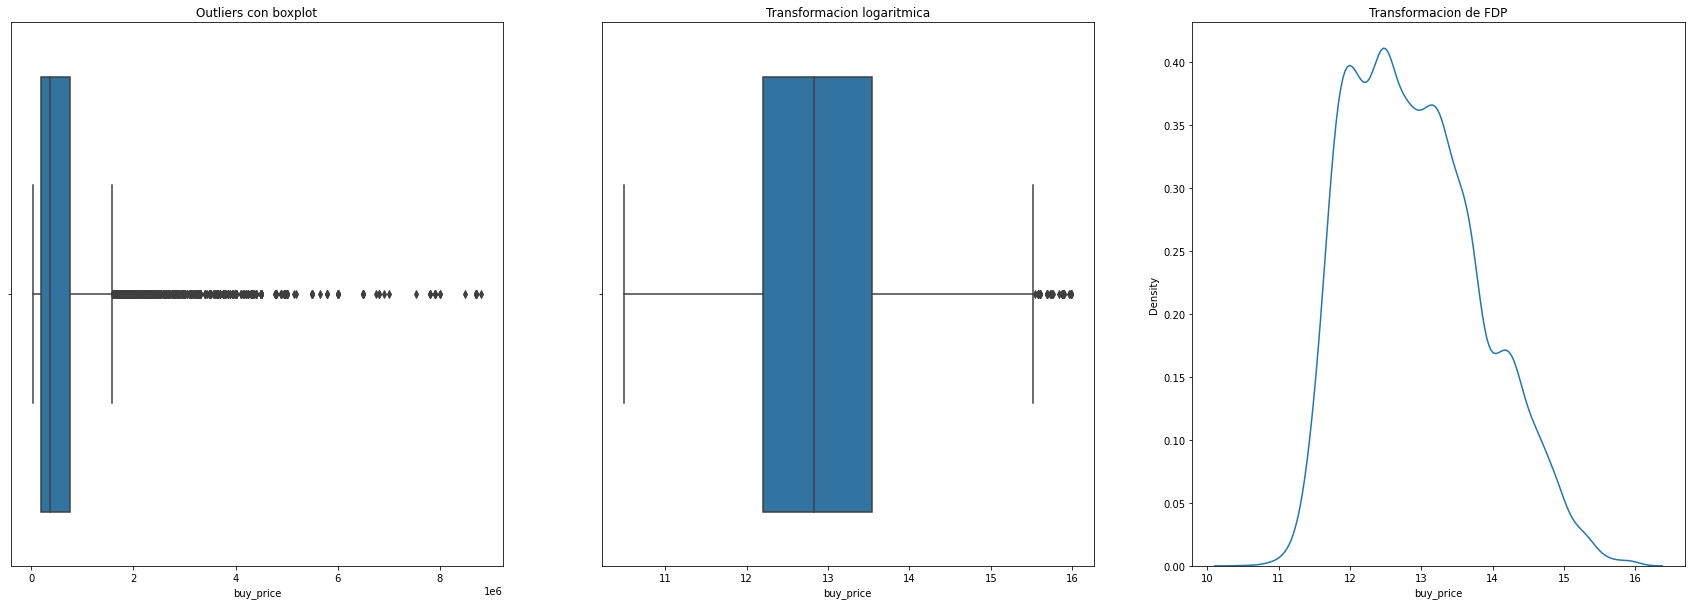

In [76]:
# Analizamos target de precio en el dataset de precios real estate madrid
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
plt.subplots_adjust(hspace = 0.3)

# Outliers con boxplot
sns.boxplot(X_y_train['buy_price'], ax=axes[0])
axes[0].set_title("Outliers con boxplot")

# Transformacion logaritmica
sns.boxplot(np.log(X_y_train['buy_price']), ax=axes[1])
axes[1].set_title("Transformacion logaritmica")

# Transformacion de FDP
sns.kdeplot(np.log(X_y_train["buy_price"]), ax=axes[2])
axes[2].set_title("Transformacion de FDP");

c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Numeric vs Numeric')

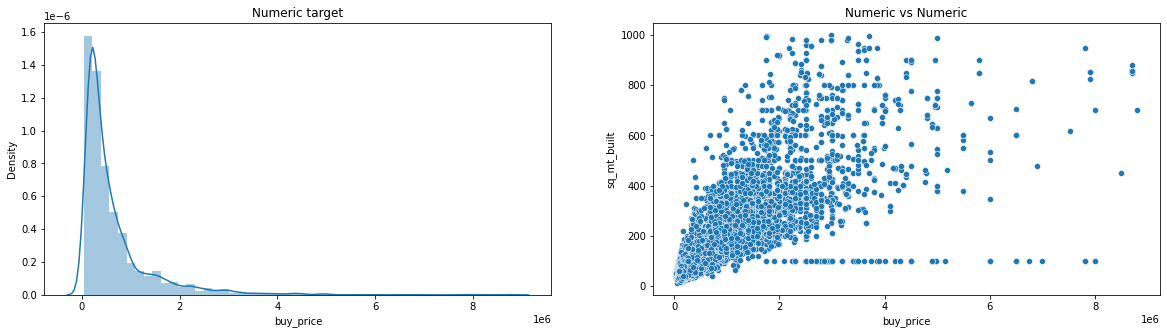

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Numeric target
sns.distplot(X_y_train['buy_price'], ax=axes[0])
axes[0].set_title("Numeric target")

# Numeric vs Numeric
sns.scatterplot(X_y_train['buy_price'], X_y_train['sq_mt_built'], ax=axes[1])
axes[1].set_title("Numeric vs Numeric")

c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Numeric vs Numeric')

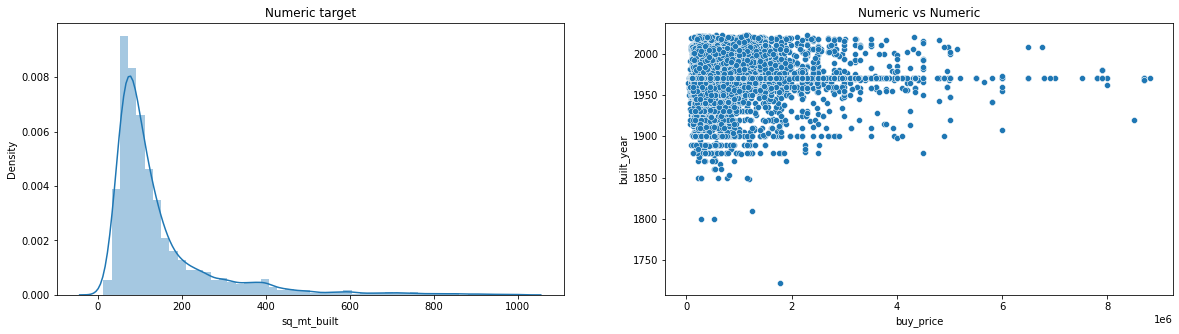

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Numeric target
sns.distplot(X_y_train['sq_mt_built'], ax=axes[0])
axes[0].set_title("Numeric target")

# Numeric vs Numeric
sns.scatterplot(X_y_train['buy_price'], X_y_train['built_year'], ax=axes[1])
axes[1].set_title("Numeric vs Numeric")

## Tratamiento de outliers

### Sobre el target

#### Para X_train

In [79]:
X_y_train.shape

(17393, 31)

In [80]:
# creamos la función que detecta los valores de los limites del tercer cuartil por 1,5 por encima y el primer cuartil por 1,5 por debajo
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range
 

In [81]:
# asignamos los dos valores de nuestro X_train a dos variables
lowerbound_bp,upperbound_bp = outlier_treatment(X_y_train.buy_price)
print(lowerbound_bp)
print(upperbound_bp)

-638100.0
1591500.0


In [82]:
# creamos un tabla con las filas de los outliers
X_y_train[(X_y_train.buy_price < lowerbound_bp) | (X_y_train.buy_price > upperbound_bp)]

,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price_by_area,house_type_id,...,has_terrace,has_balcony,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,buy_price
19252,Guindalera,340,295,6,4,1,8,4,5294,HouseType 1,...,0,0,0,5,0,0,1,0,0,1800000
12534,Chamberí,325,271,6,3,1,5,7,6708,HouseType 1,...,0,0,1,5,0,0,0,0,1,2180000
9816,Hortaleza,437,380,5,6,4,2,16,4291,HouseType 2,...,0,0,1,5,1,1,1,1,1,1875000
19380,Barrio de Salamanca,360,313,5,4,1,9,4,7222,HouseType 1,...,1,1,1,5,1,0,0,0,1,2600000
19138,Recoletos,244,212,5,3,1,4,4,6967,HouseType 1,...,0,1,1,5,0,0,1,0,0,1700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,Chamartín,258,224,2,2,1,4,5,6899,HouseType 4,...,1,0,1,5,1,0,0,0,1,1780000
14502,Nueva España,240,210,3,3,1,6,5,7062,HouseType 5,...,1,0,1,5,1,1,1,1,1,1695000
8322,Fuencarral,702,610,8,8,4,2,8,3490,HouseType 2,...,1,0,1,5,1,1,1,1,1,2450000
11284,Chamberí,460,400,7,4,1,4,7,6413,HouseType 1,...,1,0,1,5,1,1,0,1,1,2950000


In [83]:
# eliminamos todo las filas con valores en el target por abao y por ecima de dichos valores
X_y_train.drop(X_y_train[ (X_y_train.buy_price > upperbound_bp) | (X_y_train.buy_price < lowerbound_bp) ].index , inplace=True)

In [84]:
X_y_train.shape

(15753, 31)

### Observamos como quedan las distribuciones de nuestro target tras el tratamiento de outliers

c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Numeric vs Numeric')

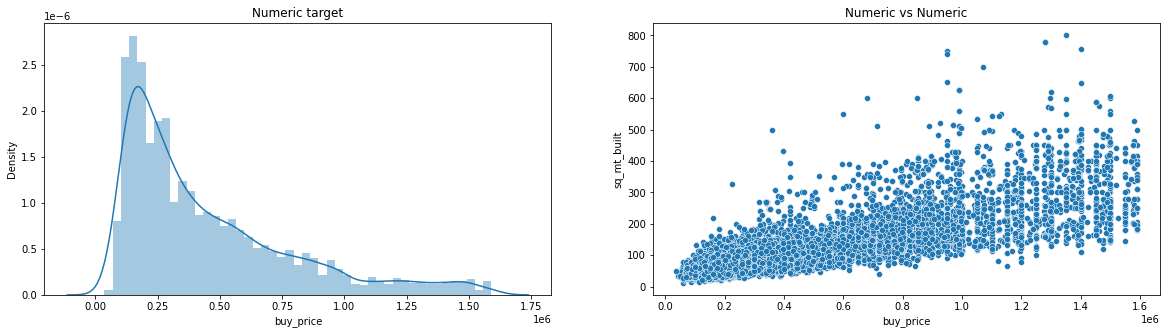

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Numeric target
sns.distplot(X_y_train['buy_price'], ax=axes[0])
axes[0].set_title("Numeric target")

# Numeric vs Numeric
sns.scatterplot(X_y_train['buy_price'], X_y_train['sq_mt_built'], ax=axes[1])
axes[1].set_title("Numeric vs Numeric")

#### Para X_test

In [86]:
# Concatemos X_test e y_test para tratar los outliers
frames = [X_test, y_test]
X_y_test =pd.concat(frames, axis=1)

In [87]:
X_y_test.shape

(4349, 31)

In [88]:
X_y_test.drop(X_y_test[ (X_y_test.buy_price > upperbound_bp) | (X_y_test.buy_price < lowerbound_bp) ].index , inplace=True)

In [89]:
X_y_test.shape

(3904, 31)

### Tratamos los outliers de la columna sq_mt_built

#### Para X_train

In [90]:
# asignamos los dos valores de nuestro X_train a dos variables
lowerbound_sq_mt,upperbound_sq_mt = outlier_treatment(X_y_train.sq_mt_built)
print(lowerbound_sq_mt)
print(upperbound_sq_mt)

-37.0
243.0


In [91]:
X_y_train.shape

(15753, 31)

In [92]:
# eliminamos todo las filas con valores en el target por abao y por ecima de dichos valores
X_y_train.drop(X_y_train[ (X_y_train.sq_mt_built > upperbound_sq_mt) | (X_y_train.sq_mt_built < lowerbound_sq_mt) ].index , inplace=True)

In [93]:
X_y_train.shape

(14614, 31)

#### Para X_test

In [94]:
X_y_test.shape

(3904, 31)

In [95]:
# eliminamos todo las filas con valores en el target por abao y por ecima de dichos valores
X_y_test.drop(X_y_test[ (X_y_test.sq_mt_built > upperbound_sq_mt) | (X_y_test.sq_mt_built < lowerbound_sq_mt) ].index , inplace=True)

In [96]:
X_y_test.shape

(3619, 31)

c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Numeric vs Numeric')

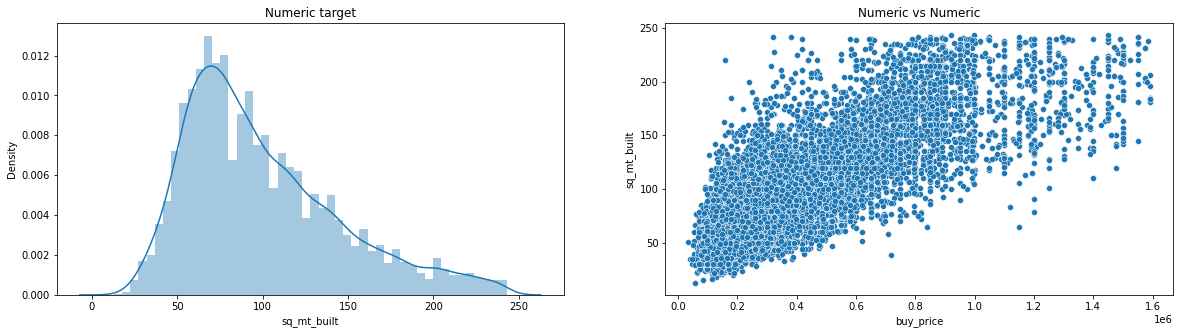

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Numeric target
sns.distplot(X_y_train['sq_mt_built'], ax=axes[0])
axes[0].set_title("Numeric target")

# Numeric vs Numeric
sns.scatterplot(X_y_train['buy_price'], X_y_train['sq_mt_built'], ax=axes[1])
axes[1].set_title("Numeric vs Numeric")

### Tratamos los outliers de la columna built_year

#### Para X_train

In [98]:
# asignamos los dos valores de nuestro X_train a dos variables
lowerbound_by,upperbound_by = outlier_treatment(X_y_train.built_year)
print(lowerbound_by)
print(upperbound_by)

1970.0
1970.0


c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Numeric vs Numeric')

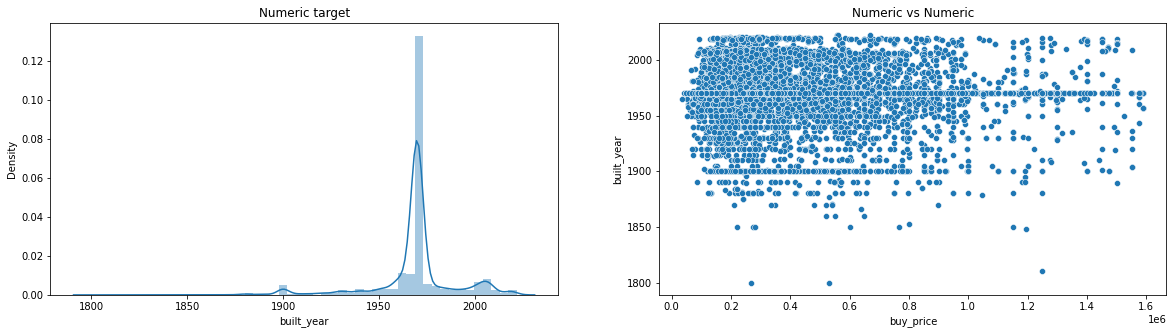

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Numeric target
sns.distplot(X_y_train['built_year'], ax=axes[0])
axes[0].set_title("Numeric target")

# Numeric vs Numeric
sns.scatterplot(X_y_train['buy_price'], X_y_train['built_year'], ax=axes[1])
axes[1].set_title("Numeric vs Numeric")

In [100]:
'''aquí no es tan buena idea aplicar el IQR ya que la densidad de la categoría está concentrada en 1970 en su gran mayoría,
por lo tanto eliminaremos solamente la larga cola hacía la izquiera excluyendo los inmuebles contruidos en el siglo XVIII'''

'aquí no es tan buena idea aplicar el IQR ya que la densidad de la categoría está concentrada en 1970 en su gran mayoría,\npor lo tanto eliminaremos solamente la larga cola hacía la izquiera excluyendo los inmuebles contruidos en el siglo XVIII'

In [101]:
X_y_train.shape

(14614, 31)

In [102]:
# eliminamos todo las filas con valores POR DEBAJO DE 1900
X_y_train.drop(X_y_train[(X_y_train.built_year < 1900) ].index , inplace=True)

In [103]:
X_y_train.shape

(14493, 31)

c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Propietario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Numeric vs Numeric')

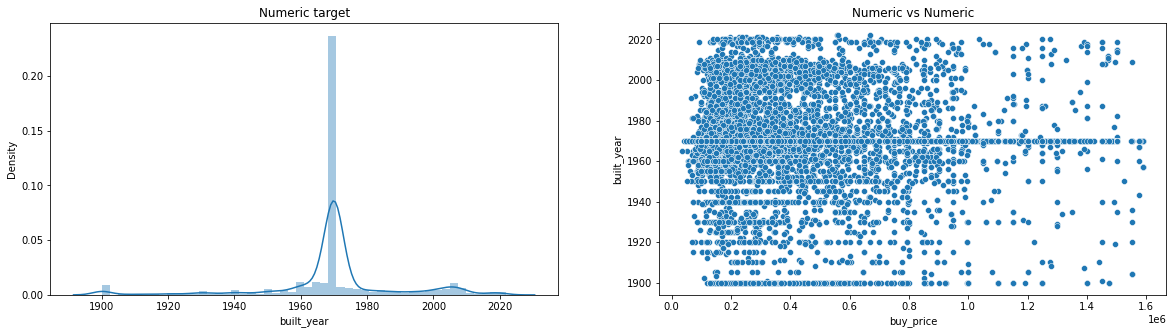

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Numeric target
sns.distplot(X_y_train['built_year'], ax=axes[0])
axes[0].set_title("Numeric target")

# Numeric vs Numeric
sns.scatterplot(X_y_train['buy_price'], X_y_train['built_year'], ax=axes[1])
axes[1].set_title("Numeric vs Numeric")

#### Para test

In [105]:
X_y_test.shape

(3619, 31)

In [106]:
# eliminamos todo las filas con valores POR DEBAJO DE 1900
X_y_test.drop(X_y_test[(X_y_test.built_year < 1900) ].index , inplace=True)

In [107]:
X_y_test.shape

(3591, 31)

### Sacamos y_train e y_test sin los outliers

In [108]:
y_train = X_y_train.pop('buy_price')
y_test = X_y_test.pop('buy_price')

In [109]:
# comprobamos que seguimos sin modificar columnas ni filas en los DataFrames
print(X_y_train.shape)
print(y_train.shape)

print(X_y_test.shape)
print(y_test.shape)

(14493, 30)
(14493,)
(3591, 30)
(3591,)


## Encoding

### Dummies para House_type_id

#### Para X_train

In [110]:
print('Número de años únicos en mi dataset:', X_y_train['house_type_id'].nunique())

Número de años únicos en mi dataset: 4


In [111]:
# sacamos los dummies y eliminamos la primera columna
df_dummies= pd.get_dummies(X_y_train['house_type_id'], drop_first=True)
df_dummies

,HouseType 2,HouseType 4,HouseType 5
1947,0,0,0
21382,0,0,0
2225,0,0,0
5201,0,0,0
15566,1,0,0
...,...,...,...
6265,0,0,0
11964,0,0,0
5390,0,0,0
860,0,0,0


In [112]:
# eliminamos la columna inicial de house_type_id
X_y_train = X_y_train.drop(['house_type_id'], axis=1)
X_y_train

,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price_by_area,is_renewal_needed,...,has_pool,has_terrace,has_balcony,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
1947,Usera,78,73,3,1,1,6,12,2000,0,...,0,1,1,0,5,0,0,1,0,1
21382,Moratalaz,169,147,3,2,1,6,14,3669,0,...,1,0,0,1,5,1,0,0,0,1
2225,Almendrales,30,26,0,1,1,6,12,5000,0,...,1,0,0,0,5,1,0,0,0,1
5201,Portazgo,74,70,3,1,1,11,13,3919,0,...,0,1,0,1,5,0,0,0,0,1
15566,Chamartín,180,156,3,3,3,2,5,5222,0,...,0,1,1,0,5,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,Aluche,98,79,2,1,1,5,10,2449,0,...,0,1,1,0,5,1,0,0,0,1
11964,Gaztambide,75,66,1,2,1,2,7,4667,1,...,0,0,0,0,5,0,0,1,0,0
5390,Palomeras Bajas,61,53,2,1,1,4,13,1623,1,...,0,1,1,0,5,0,0,0,0,1
860,Ambroz,100,80,3,2,1,4,19,2699,0,...,1,0,0,1,5,1,0,0,0,1


In [113]:
# introducimos en nuestro dataframe el df con los dummies
X_y_train= pd.concat([X_y_train, df_dummies], axis=1)
X_y_train

,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price_by_area,is_renewal_needed,...,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,HouseType 2,HouseType 4,HouseType 5
1947,Usera,78,73,3,1,1,6,12,2000,0,...,0,5,0,0,1,0,1,0,0,0
21382,Moratalaz,169,147,3,2,1,6,14,3669,0,...,1,5,1,0,0,0,1,0,0,0
2225,Almendrales,30,26,0,1,1,6,12,5000,0,...,0,5,1,0,0,0,1,0,0,0
5201,Portazgo,74,70,3,1,1,11,13,3919,0,...,1,5,0,0,0,0,1,0,0,0
15566,Chamartín,180,156,3,3,3,2,5,5222,0,...,0,5,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,Aluche,98,79,2,1,1,5,10,2449,0,...,0,5,1,0,0,0,1,0,0,0
11964,Gaztambide,75,66,1,2,1,2,7,4667,1,...,0,5,0,0,1,0,0,0,0,0
5390,Palomeras Bajas,61,53,2,1,1,4,13,1623,1,...,0,5,0,0,0,0,1,0,0,0
860,Ambroz,100,80,3,2,1,4,19,2699,0,...,1,5,1,0,0,0,1,0,0,0


#### Para X_test

In [114]:
df_dummies= pd.get_dummies(X_y_test['house_type_id'], drop_first=True)
df_dummies

,HouseType 2,HouseType 4,HouseType 5
21257,0,0,0
3230,0,1,0
18790,0,0,0
12367,0,0,0
20208,0,0,0
...,...,...,...
7680,0,0,0
485,0,0,0
967,0,0,0
12166,0,0,0


In [115]:
X_y_test = X_y_test.drop(['house_type_id'], axis=1)
X_y_test

,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price_by_area,is_renewal_needed,...,has_pool,has_terrace,has_balcony,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
21257,El Cañaveral - Los Berrocales,82.0,67.86,3,2,1.0,4,19,2878,0,...,1,1,0,1,2,1,0,0,0,1
3230,Cuzco-Castillejos,130.0,147.03,3,2,1.0,11,6,7308,0,...,0,1,0,0,3,1,0,0,0,0
18790,Lavapiés-Embajadores,66.0,26.10,4,1,1.0,5,1,3485,1,...,0,0,0,0,7,0,0,0,0,1
12367,Trafalgar,71.0,156.60,1,1,1.0,4,7,8239,0,...,1,0,0,1,1,0,0,0,0,1
20208,Legazpi,64.0,51.00,1,1,1.0,8,2,5891,0,...,0,1,0,1,5,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7680,Argüelles,79.0,120.06,2,1,1.0,0,9,4747,0,...,0,0,0,0,5,0,0,0,0,1
485,San Cristóbal,60.0,204.45,2,1,1.0,2,17,1167,0,...,0,0,0,0,5,0,0,0,0,1
967,El Cañaveral - Los Berrocales,125.0,87.00,3,2,1.0,4,19,3223,0,...,0,1,0,0,5,0,0,0,0,1
12166,Trafalgar,122.0,139.20,3,2,1.0,5,7,5902,0,...,0,0,0,0,3,0,0,0,0,1


In [116]:
X_y_test= pd.concat([X_y_test, df_dummies], axis=1)
X_y_test

,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,buy_price_by_area,is_renewal_needed,...,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,HouseType 2,HouseType 4,HouseType 5
21257,El Cañaveral - Los Berrocales,82.0,67.86,3,2,1.0,4,19,2878,0,...,1,2,1,0,0,0,1,0,0,0
3230,Cuzco-Castillejos,130.0,147.03,3,2,1.0,11,6,7308,0,...,0,3,1,0,0,0,0,0,1,0
18790,Lavapiés-Embajadores,66.0,26.10,4,1,1.0,5,1,3485,1,...,0,7,0,0,0,0,1,0,0,0
12367,Trafalgar,71.0,156.60,1,1,1.0,4,7,8239,0,...,1,1,0,0,0,0,1,0,0,0
20208,Legazpi,64.0,51.00,1,1,1.0,8,2,5891,0,...,1,5,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7680,Argüelles,79.0,120.06,2,1,1.0,0,9,4747,0,...,0,5,0,0,0,0,1,0,0,0
485,San Cristóbal,60.0,204.45,2,1,1.0,2,17,1167,0,...,0,5,0,0,0,0,1,0,0,0
967,El Cañaveral - Los Berrocales,125.0,87.00,3,2,1.0,4,19,3223,0,...,0,5,0,0,0,0,1,0,0,0
12166,Trafalgar,122.0,139.20,3,2,1.0,5,7,5902,0,...,0,3,0,0,0,0,1,0,0,0


### Hashing

#### Para X_train

In [117]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=5, input_type='string')
f = h.transform(X_y_train['subtitle'])
f.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 4.,  0.,  1.,  1., -1.],
       [ 2.,  1.,  3.,  0.,  1.],
       ...,
       [ 5., -1.,  1.,  1., -1.],
       [ 0.,  0.,  1.,  1.,  0.],
       [ 3., -2.,  1.,  1., -2.]])

In [118]:
hash_df= pd.DataFrame(f.toarray())
hash_df

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,4.0,0.0,1.0,1.0,-1.0
2,2.0,1.0,3.0,0.0,1.0
3,1.0,-1.0,-1.0,2.0,-1.0
4,2.0,1.0,0.0,0.0,-2.0
...,...,...,...,...,...
14488,-1.0,0.0,2.0,0.0,1.0
14489,1.0,-1.0,0.0,0.0,2.0
14490,5.0,-1.0,1.0,1.0,-1.0
14491,0.0,0.0,1.0,1.0,0.0


In [119]:
hash_df = hash_df.rename(columns={0:'subtitle 0',
                        1:'subtitle 1',
                        2:'subtitle 2',
                        3:'subtitle 3',
                        4:'subtitle 4'})
hash_df

,subtitle 0,subtitle 1,subtitle 2,subtitle 3,subtitle 4
0,1.0,0.0,0.0,0.0,0.0
1,4.0,0.0,1.0,1.0,-1.0
2,2.0,1.0,3.0,0.0,1.0
3,1.0,-1.0,-1.0,2.0,-1.0
4,2.0,1.0,0.0,0.0,-2.0
...,...,...,...,...,...
14488,-1.0,0.0,2.0,0.0,1.0
14489,1.0,-1.0,0.0,0.0,2.0
14490,5.0,-1.0,1.0,1.0,-1.0
14491,0.0,0.0,1.0,1.0,0.0


In [120]:
hash_df.set_index(X_y_train.index,inplace = True)

In [121]:
X_y_train = pd.concat([hash_df, X_y_train],axis = 1 )
X_y_train= X_y_train.drop(['subtitle'], axis=1)
X_y_train

,subtitle 0,subtitle 1,subtitle 2,subtitle 3,subtitle 4,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,...,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,HouseType 2,HouseType 4,HouseType 5
1947,1.0,0.0,0.0,0.0,0.0,78,73,3,1,1,...,0,5,0,0,1,0,1,0,0,0
21382,4.0,0.0,1.0,1.0,-1.0,169,147,3,2,1,...,1,5,1,0,0,0,1,0,0,0
2225,2.0,1.0,3.0,0.0,1.0,30,26,0,1,1,...,0,5,1,0,0,0,1,0,0,0
5201,1.0,-1.0,-1.0,2.0,-1.0,74,70,3,1,1,...,1,5,0,0,0,0,1,0,0,0
15566,2.0,1.0,0.0,0.0,-2.0,180,156,3,3,3,...,0,5,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-1.0,0.0,2.0,0.0,1.0,98,79,2,1,1,...,0,5,1,0,0,0,1,0,0,0
11964,1.0,-1.0,0.0,0.0,2.0,75,66,1,2,1,...,0,5,0,0,1,0,0,0,0,0
5390,5.0,-1.0,1.0,1.0,-1.0,61,53,2,1,1,...,0,5,0,0,0,0,1,0,0,0
860,0.0,0.0,1.0,1.0,0.0,100,80,3,2,1,...,1,5,1,0,0,0,1,0,0,0


In [122]:
X_y_train.dtypes

subtitle 0                float64
subtitle 1                float64
subtitle 2                float64
subtitle 3                float64
subtitle 4                float64
sq_mt_built                 int32
sq_mt_useful                int32
n_rooms                     int32
n_bathrooms                 int32
n_floors                    int32
floor                       int32
neighborhood_id             int32
buy_price_by_area           int32
is_renewal_needed           int32
is_new_development          int32
built_year                  int32
has_central_heating         int32
has_individual_heating      int32
has_ac                      int32
has_fitted_wardrobes        int32
has_lift                    int32
is_exterior                 int32
has_garden                  int32
has_pool                    int32
has_terrace                 int32
has_balcony                 int32
has_storage_room            int32
energy_certificate          int32
has_parking                 int32
is_orientation

In [123]:
X_y_train['subtitle 0'] = X_y_train['subtitle 0'].astype(np.int32)
X_y_train['subtitle 1'] = X_y_train['subtitle 1'].astype(np.int32)
X_y_train['subtitle 2'] = X_y_train['subtitle 2'].astype(np.int32)
X_y_train['subtitle 3'] = X_y_train['subtitle 3'].astype(np.int32)
X_y_train['subtitle 4'] = X_y_train['subtitle 4'].astype(np.int32)

#### Para X_test

In [124]:
f2 = FeatureHasher(n_features=5, input_type='string')
f2 = h.transform(X_y_test['subtitle'])
f2.toarray()
hash_df2= pd.DataFrame(f.toarray())

In [125]:
hash_df2= pd.DataFrame(f2.toarray())

In [126]:
hash_df2 = hash_df2.rename(columns={0:'subtitle 0',
                        1:'subtitle 1',
                        2:'subtitle 2',
                        3:'subtitle 3',
                        4:'subtitle 4'})

In [127]:
hash_df2.set_index(X_y_test.index,inplace = True)

In [128]:
X_y_test = pd.concat([hash_df2, X_y_test],axis = 1 )
X_y_test= X_y_test.drop(['subtitle'], axis=1)
X_y_test

,subtitle 0,subtitle 1,subtitle 2,subtitle 3,subtitle 4,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,...,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,HouseType 2,HouseType 4,HouseType 5
21257,8.0,-2.0,6.0,1.0,0.0,82.0,67.86,3,2,1.0,...,1,2,1,0,0,0,1,0,0,0
3230,0.0,-4.0,2.0,2.0,-3.0,130.0,147.03,3,2,1.0,...,0,3,1,0,0,0,0,0,1,0
18790,6.0,-4.0,1.0,0.0,-1.0,66.0,26.10,4,1,1.0,...,0,7,0,0,0,0,1,0,0,0
12367,5.0,-1.0,0.0,1.0,0.0,71.0,156.60,1,1,1.0,...,1,1,0,0,0,0,1,0,0,0
20208,0.0,-3.0,-1.0,0.0,1.0,64.0,51.00,1,1,1.0,...,1,5,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7680,1.0,0.0,2.0,0.0,2.0,79.0,120.06,2,1,1.0,...,0,5,0,0,0,0,1,0,0,0
485,3.0,-2.0,2.0,-1.0,-3.0,60.0,204.45,2,1,1.0,...,0,5,0,0,0,0,1,0,0,0
967,8.0,-2.0,6.0,1.0,0.0,125.0,87.00,3,2,1.0,...,0,5,0,0,0,0,1,0,0,0
12166,5.0,-1.0,0.0,1.0,0.0,122.0,139.20,3,2,1.0,...,0,3,0,0,0,0,1,0,0,0


In [129]:
X_y_test['subtitle 0'] = X_y_test['subtitle 0'].astype(np.int32)
X_y_test['subtitle 1'] = X_y_test['subtitle 1'].astype(np.int32)
X_y_test['subtitle 2'] = X_y_test['subtitle 2'].astype(np.int32)
X_y_test['subtitle 3'] = X_y_test['subtitle 3'].astype(np.int32)
X_y_test['subtitle 4'] = X_y_test['subtitle 4'].astype(np.int32)

## Estandarizar

In [130]:
train_stats = X_y_train.describe()
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
subtitle 0,14493.0,2.430898,1.857244,-1.0,1.0,2.0,3.0,8.0
subtitle 1,14493.0,-1.041054,1.208255,-5.0,-2.0,-1.0,0.0,2.0
subtitle 2,14493.0,1.219692,1.603295,-2.0,0.0,1.0,2.0,6.0
subtitle 3,14493.0,0.411647,0.886854,-2.0,0.0,0.0,1.0,4.0
subtitle 4,14493.0,0.000345,1.805950,-5.0,-1.0,0.0,1.0,5.0
sq_mt_built,14493.0,100.036638,45.266167,13.0,66.0,90.0,125.0,243.0
sq_mt_useful,14493.0,85.874974,39.073970,1.0,57.0,77.0,107.0,230.0
n_rooms,14493.0,2.616229,1.101760,0.0,2.0,3.0,3.0,14.0
n_bathrooms,14493.0,1.633961,0.754011,1.0,1.0,2.0,2.0,10.0
n_floors,14493.0,1.015525,0.172156,1.0,1.0,1.0,1.0,4.0


In [131]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(X_y_train)
normed_test_data = norm(X_y_test)

print(normed_train_data.shape)
print(normed_test_data.shape)

(14493, 36)
(3591, 36)


In [132]:
normed_train_data

,subtitle 0,subtitle 1,subtitle 2,subtitle 3,subtitle 4,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,...,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,HouseType 2,HouseType 4,HouseType 5
1947,-0.770442,0.861618,-0.760741,-0.464165,-0.000191,-0.486824,-0.329503,0.348326,-0.840786,-0.090179,...,-0.657870,0.145475,-0.635765,-0.392757,2.112966,-0.392757,0.626893,-0.124719,-0.1719,-0.220324
21382,0.844855,0.861618,-0.137025,0.663416,-0.553916,1.523508,1.564341,0.348326,0.485456,-0.090179,...,1.519953,0.145475,1.572801,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.1719,-0.220324
2225,-0.232009,1.689258,1.110405,-0.464165,0.553534,-1.547218,-1.532349,-2.374591,-0.840786,-0.090179,...,-0.657870,0.145475,1.572801,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.1719,-0.220324
5201,-0.770442,0.033978,-1.384456,1.790996,-0.553916,-0.575190,-0.406280,0.348326,-0.840786,-0.090179,...,1.519953,0.145475,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.1719,-0.220324
15566,-0.232009,1.689258,-0.760741,-0.464165,-1.107642,1.766515,1.794674,0.348326,1.811697,11.527225,...,-0.657870,0.145475,-0.635765,2.545926,2.112966,2.545926,0.626893,8.017440,-0.1719,-0.220324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-1.847306,0.861618,0.486690,-0.464165,0.553534,-0.044993,-0.175948,-0.559313,-0.840786,-0.090179,...,-0.657870,0.145475,1.572801,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.1719,-0.220324
11964,-0.770442,0.033978,-0.760741,-0.464165,1.107259,-0.553098,-0.508650,-1.466952,0.485456,-0.090179,...,-0.657870,0.145475,-0.635765,-0.392757,2.112966,-0.392757,-1.595059,-0.124719,-0.1719,-0.220324
5390,1.383288,0.033978,-0.137025,0.663416,-0.553916,-0.862380,-0.841352,-0.559313,-0.840786,-0.090179,...,-0.657870,0.145475,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.1719,-0.220324
860,-1.308874,0.861618,-0.137025,0.663416,-0.000191,-0.000809,-0.150355,0.348326,0.485456,-0.090179,...,1.519953,0.145475,1.572801,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.1719,-0.220324


In [133]:
normed_test_data[:10]

,subtitle 0,subtitle 1,subtitle 2,subtitle 3,subtitle 4,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,...,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,HouseType 2,HouseType 4,HouseType 5
21257,2.998584,-0.793662,2.981551,0.663416,-0.000191,-0.398457,-0.461048,0.348326,0.485456,-0.090179,...,1.519953,-2.817097,1.572801,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
3230,-1.308874,-2.448942,0.486690,1.790996,-1.661367,0.661937,1.565109,0.348326,0.485456,-0.090179,...,-0.657870,-1.829573,1.572801,-0.392757,-0.473236,-0.392757,-1.595059,-0.124719,5.816924,-0.220324
18790,1.921720,-2.448942,-0.137025,-0.464165,-0.553916,-0.751922,-1.529790,1.255965,-0.840786,-0.090179,...,-0.657870,2.120522,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
12367,1.383288,0.033978,-0.760741,0.663416,-0.000191,-0.641464,1.810029,-1.466952,-0.840786,-0.090179,...,1.519953,-3.804621,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
20208,-1.308874,-1.621302,-1.384456,-0.464165,0.553534,-0.796105,-0.892537,-1.466952,-0.840786,-0.090179,...,1.519953,0.145475,1.572801,-0.392757,2.112966,-0.392757,-1.595059,-0.124719,-0.171900,-0.220324
8657,0.306423,-1.621302,0.486690,-0.464165,-1.107642,-0.000809,-0.483313,0.348326,0.485456,-0.090179,...,1.519953,0.145475,1.572801,2.545926,2.112966,2.545926,-1.595059,-0.124719,-0.171900,-0.220324
17165,-0.232009,0.033978,-0.137025,-0.464165,-0.000191,-0.508915,-0.508650,-0.559313,0.485456,-0.090179,...,1.519953,0.145475,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
17557,-0.770442,0.033978,-0.760741,0.663416,-0.553916,0.418930,0.617419,0.348326,0.485456,-0.090179,...,-0.657870,2.120522,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
17919,-0.770442,0.033978,-0.760741,0.663416,-0.553916,-1.326303,5.995936,-1.466952,-0.840786,-0.090179,...,-0.657870,-3.804621,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
7625,0.306423,2.516898,-0.137025,-0.464165,1.107259,1.214226,1.385194,1.255965,1.811697,-0.090179,...,1.519953,0.145475,1.572801,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324


### Construimos el modelo

In [134]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = [len(X_y_train.keys())]),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)
])

model.compile(loss = 'mse',
             optimizer = tf.keras.optimizers.RMSprop(0.001),
             metrics = ['mae', 'mse'])

In [135]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2368      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,593
Trainable params: 6,593
Non-trainable params: 0
_________________________________________________________________


### Entrenamos el modelo

In [136]:
history = model.fit(
    normed_train_data,
    y_train,
    epochs = 150,
    validation_split = 0.2,
    verbose=0,
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

### Visualizamos el progreso de entrenamiento del modelo usando las estadísticas almacenadas en history.

In [137]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,2.329392e+11,392330.87500,2.329392e+11,2.360311e+11,395739.656250,2.360311e+11,0
1,2.309852e+11,390854.06250,2.309852e+11,2.322394e+11,392921.625000,2.322394e+11,1
2,2.246122e+11,386053.12500,2.246122e+11,2.225114e+11,385635.156250,2.225114e+11,2
3,2.112446e+11,375763.25000,2.112446e+11,2.043991e+11,371543.781250,2.043991e+11,3
4,1.887829e+11,357587.34375,1.887829e+11,1.769632e+11,348469.250000,1.769632e+11,4
5,1.574061e+11,329304.18750,1.574061e+11,1.411636e+11,313919.343750,1.411636e+11,5
6,1.202917e+11,289316.25000,1.202917e+11,1.025272e+11,267427.156250,1.025272e+11,6
7,8.418547e+10,240255.62500,8.418547e+10,6.998229e+10,219357.203125,6.998229e+10,7
8,5.875687e+10,201279.87500,5.875687e+10,5.285598e+10,192394.812500,5.285598e+10,8
9,4.714637e+10,182747.31250,4.714637e+10,4.541411e+10,179576.437500,4.541411e+10,9


In [138]:
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
140,2.348498e+09,28869.025391,2.348498e+09,2.589119e+09,30567.011719,2.589119e+09,140
141,2.339468e+09,28865.160156,2.339468e+09,2.589701e+09,30653.591797,2.589701e+09,141
142,2.343469e+09,28873.685547,2.343469e+09,2.583549e+09,30490.080078,2.583549e+09,142
143,2.337617e+09,28873.544922,2.337617e+09,2.579139e+09,30067.908203,2.579139e+09,143
144,2.333396e+09,28821.699219,2.333396e+09,2.569540e+09,30249.789062,2.569540e+09,144
145,2.332107e+09,28835.929688,2.332107e+09,2.573569e+09,29990.591797,2.573569e+09,145
146,2.327380e+09,28667.812500,2.327380e+09,2.573618e+09,30061.054688,2.573618e+09,146
147,2.324226e+09,28750.394531,2.324226e+09,2.568465e+09,30246.583984,2.568465e+09,147
148,2.322431e+09,28642.044922,2.322431e+09,2.565316e+09,30692.169922,2.565316e+09,148
149,2.317975e+09,28686.064453,2.317975e+09,2.562649e+09,30131.951172,2.562649e+09,149


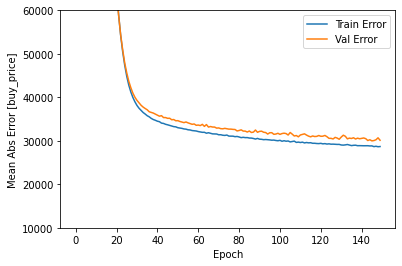

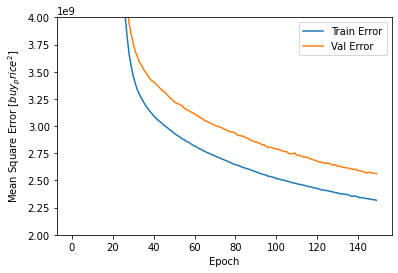

In [139]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [buy_price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([10000,60000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$buy_price^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([2000000000,4000000000])
  plt.legend()
  plt.show()


plot_history(history)

### Comprobamos como generaliza el modelo en test

In [140]:
loss, mae, mse = model.evaluate(normed_test_data, y_test)
mae

113/113 [==============================] - 0s 2ms/step - loss: 25386131456.0000 - mae: 73933.7109 - mse: 25386131456.0000


73933.7109375

In [141]:
example_batch1 = normed_test_data[:]
example_batch1

,subtitle 0,subtitle 1,subtitle 2,subtitle 3,subtitle 4,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,...,has_storage_room,energy_certificate,has_parking,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,HouseType 2,HouseType 4,HouseType 5
21257,2.998584,-0.793662,2.981551,0.663416,-0.000191,-0.398457,-0.461048,0.348326,0.485456,-0.090179,...,1.519953,-2.817097,1.572801,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
3230,-1.308874,-2.448942,0.486690,1.790996,-1.661367,0.661937,1.565109,0.348326,0.485456,-0.090179,...,-0.657870,-1.829573,1.572801,-0.392757,-0.473236,-0.392757,-1.595059,-0.124719,5.816924,-0.220324
18790,1.921720,-2.448942,-0.137025,-0.464165,-0.553916,-0.751922,-1.529790,1.255965,-0.840786,-0.090179,...,-0.657870,2.120522,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
12367,1.383288,0.033978,-0.760741,0.663416,-0.000191,-0.641464,1.810029,-1.466952,-0.840786,-0.090179,...,1.519953,-3.804621,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
20208,-1.308874,-1.621302,-1.384456,-0.464165,0.553534,-0.796105,-0.892537,-1.466952,-0.840786,-0.090179,...,1.519953,0.145475,1.572801,-0.392757,2.112966,-0.392757,-1.595059,-0.124719,-0.171900,-0.220324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7680,-0.770442,0.861618,0.486690,-0.464165,1.107259,-0.464732,0.874880,-0.559313,-0.840786,-0.090179,...,-0.657870,0.145475,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
485,0.306423,-0.793662,0.486690,-1.591746,-1.661367,-0.884472,3.034630,-0.559313,-0.840786,-0.090179,...,-0.657870,0.145475,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
967,2.998584,-0.793662,2.981551,0.663416,-0.000191,0.551479,0.028792,0.348326,0.485456,-0.090179,...,-0.657870,0.145475,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324
12166,1.383288,0.033978,-0.760741,0.663416,-0.000191,0.485205,1.364720,0.348326,0.485456,-0.090179,...,-0.657870,-1.829573,-0.635765,-0.392757,-0.473236,-0.392757,0.626893,-0.124719,-0.171900,-0.220324


### Hacemos las conversiones necesarias para tener y_test e y_pred con el mismo type y obtener el mape

In [142]:
example_result1 = model.predict(example_batch1)
example_result1

113/113 [==============================] - 0s 1ms/step


array([[237199.16],
       [993705.9 ],
       [202575.52],
       ...,
       [346289.72],
       [729986.8 ],
       [228335.73]], dtype=float32)

In [143]:
print("initial array", str(example_result1))

initial array [[237199.16]
 [993705.9 ]
 [202575.52]
 ...
 [346289.72]
 [729986.8 ]
 [228335.73]]


In [144]:
y_pred = example_result1.flatten()
y_pred

array([237199.16, 993705.9 , 202575.52, ..., 346289.72, 729986.8 ,
       228335.73], dtype=float32)

In [145]:
y_pred = pd.Series(y_pred.ravel())
y_pred

0       237199.156250
1       993705.875000
2       202575.515625
3       861691.312500
4       415614.593750
            ...      
3586    395445.218750
3587    132368.656250
3588    346289.718750
3589    729986.812500
3590    228335.734375
Length: 3591, dtype: float32

In [146]:
y_test=y_test.astype(float)
y_test

21257    241813.0
3230     950000.0
18790    230000.0
12367    585000.0
20208    377000.0
           ...   
7680     375000.0
485       70000.0
967      402900.0
12166    720000.0
16006    235000.0
Name: buy_price, Length: 3591, dtype: float64

In [147]:
tf.keras.metrics.mean_absolute_percentage_error(
    y_pred, y_test
)

<tf.Tensor: shape=(), dtype=float64, numpy=14.204584226907208>

### Probamos el modelo con 10 ejemplos de test

In [148]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 30ms/step


array([[154703.66],
       [648724.1 ],
       [188426.12],
       [268362.6 ],
       [854009.9 ],
       [209459.6 ],
       [668493.5 ],
       [253645.3 ],
       [621103.94],
       [156401.62]], dtype=float32)

In [149]:
y_train[:10]

1947     156000
21382    620000
2225     150000
5201     290000
15566    940000
13196    225000
10722    650000
18859    278000
9999     656000
3204     155000
Name: buy_price, dtype: int64

### Probamos el modelo con 10 ejemplos de test

In [150]:
example_batch = normed_test_data[20:40]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 23ms/step


array([[464228.62],
       [282283.84],
       [780620.75],
       [137074.72],
       [336475.16],
       [566789.06],
       [779255.5 ],
       [597683.56],
       [521726.8 ],
       [156125.25],
       [771269.2 ],
       [218846.9 ],
       [630023.1 ],
       [330500.7 ],
       [255106.25],
       [928086.1 ],
       [301844.1 ],
       [253509.3 ],
       [427886.28],
       [111275.71]], dtype=float32)

In [151]:
y_test[20:40]

3703     470000.0
1891     278000.0
11231    980000.0
2325     129900.0
12049    225000.0
8658     645000.0
19813    498000.0
10644    635000.0
19318    660000.0
5584     150000.0
13342    850000.0
20545    199900.0
14768    730000.0
971      369000.0
945      270000.0
7517     955000.0
19351    350000.0
4977     169999.0
3769     488000.0
21432    110000.0
Name: buy_price, dtype: float64

113/113 [==============================] - 0s 2ms/step


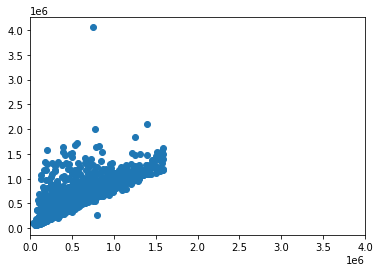

In [155]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(y_test, test_predictions)
plt.ylim()
plt.xlim(0,4000000);

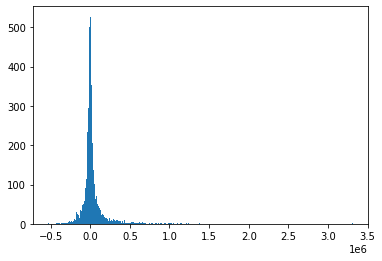

In [169]:
error = test_predictions - y_test
plt.hist(error, bins=300);

In [154]:
#observamos como por norma general las predicciones son muy exactas, exceptuando ciertos outliers con error altos que perjudican al mape, siendo este de un 14,52%